In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import tsfresh

In [270]:
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,0.038544,0.011208,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,-0.000385,0.005170,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,0.080500,0.015296,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,-0.024479,0.004101,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,-0.004125,0.021019,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [273]:
agg.head()

,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,TY,06,063,20G
1,34,TY,4,11,35A
2,100,BH,02,38,C09
3,152,BH,02,139,00L
4,182,TY,8,33,16K


In [279]:
df.dropna(axis=1, inplace=True)

In [280]:
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,0.038544,0.011208,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,-0.000385,0.005170,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,0.080500,0.015296,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,-0.024479,0.004101,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,-0.004125,0.021019,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [281]:
scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)

In [282]:
X.shape

(3193, 441)

In [283]:
names = df.columns

## t-SNE

In [121]:
dimred = TSNE()

In [122]:
plot_df = dimred.fit_transform(X)

In [124]:
plot_df = pd.DataFrame(plot_df).join(extracted_features.reset_index())

In [125]:
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,37.741581,-27.566444,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,13.865273,-0.667339,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,-40.219021,-46.815456,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,27.312504,34.254196,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,14.922091,-47.124943,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [126]:
dimred.kl_divergence_

1.549477458000183

In [127]:
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)

plot_df = plot_df.merge(agg, how='left', on='sku_key')

In [128]:
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,37.741581,-27.566444,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,...,25.0,0.0,0.0,0.621100,0.0,28,TY,06,063,20G
1,13.865273,-0.667339,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,...,78.0,0.0,0.0,0.236220,0.0,34,TY,4,11,35A
2,-40.219021,-46.815456,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,...,157.0,0.0,0.0,5.145510,1.0,100,BH,02,38,C09
3,27.312504,34.254196,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,...,16.0,0.0,0.0,0.109897,0.0,152,BH,02,139,00L
4,14.922091,-47.124943,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,...,135.0,0.0,0.0,4.060313,1.0,182,TY,8,33,16K


In [137]:
listof = {}
for i, j in enumerate(plot_df['sku_category'].unique()):
    listof[j] = i

In [138]:
plot_df['sku_category'] = plot_df['sku_category'].map(listof)

Map to colors

In [139]:
plot_df['sku_category'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123], dtype=int64)

IndexError: list index out of range

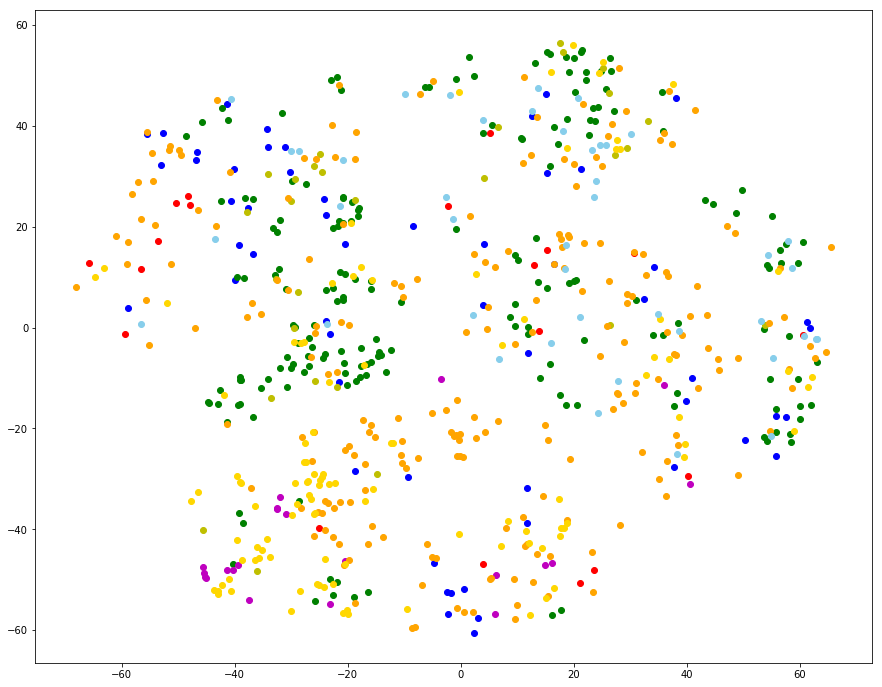

In [140]:
f, ax = plt.subplots(figsize=(15,12))

colors=['b', 'r', 'g', 'y', 'm', 'orange', 'gold', 'skyblue']

for i in plot_df['sku_category'].unique():
    ax.scatter(plot_df[plot_df['sku_category'] == i][0], plot_df[plot_df['sku_category'] == i][1],
    color=colors[i], label=i)           
    
ax.legend()

## Self Organizing Maps

In [141]:
extracted_features.shape

(3193, 441)

In [145]:
extracted_features.head()

,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","sales__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,0.038544,0.011208,-0.161094,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,-0.000385,0.005170,0.718541,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,0.080500,0.015296,2.354407,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,-0.024479,0.004101,0.884164,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,-0.004125,0.021019,3.452103,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [142]:
from minisom import MiniSom

In [144]:
som = MiniSom(x=30, y=30, input_len=441, learning_rate=0.01)

In [146]:
som.random_weights_init(X)
som.train_random(X, 1000)

In [147]:
from pylab import bone, pcolor, colorbar, plot, show, figure, text

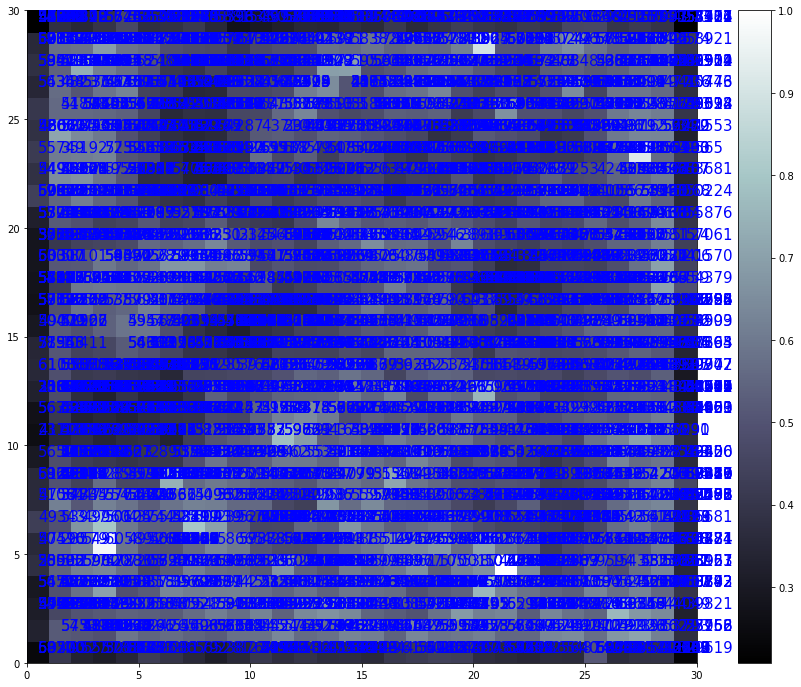

In [149]:
figure(figsize=(15,12))
bone()
pcolor(som.distance_map().T)
colorbar()

colors = ['r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',]
wenners = []
for i, j in enumerate(X):
    
    w = som.winner(j)
    wenners.append(w)
    text(w[0] + 0.5,
         w[1] + 0.5,
         skus[i],
         color = 'blue',
         fontsize=15)
show()

## SOMPY implementation

In [150]:
from sompy.sompy import SOMFactory

In [151]:
sm = SOMFactory().build(X, normalization = 'var', initialization='random')
sm.train(n_job=1, verbose='info', train_rough_len=5, train_finetune_len=10)

 Training...
 random_initialization took: 0.015000 seconds
 Rough training...
 radius_ini: 6.000000 , radius_final: 1.000000, trainlen: 5

 epoch: 1 ---> elapsed time:  0.145000, quantization error: 264.772834

 epoch: 2 ---> elapsed time:  0.150000, quantization error: 13.197651

 epoch: 3 ---> elapsed time:  0.140000, quantization error: 12.270514

 epoch: 4 ---> elapsed time:  0.141000, quantization error: 11.455519

 epoch: 5 ---> elapsed time:  0.151000, quantization error: 10.940193

 Finetune training...
 radius_ini: 1.500000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.149000, quantization error: 10.291636

 epoch: 2 ---> elapsed time:  0.140000, quantization error: 10.333471

 epoch: 3 ---> elapsed time:  0.140000, quantization error: 10.222229

 epoch: 4 ---> elapsed time:  0.149000, quantization error: 10.141606

 epoch: 5 ---> elapsed time:  0.140000, quantization error: 10.073920

 epoch: 6 ---> elapsed time:  0.160000, quantization error: 10.006

In [152]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.2361415596617601; Quantization error = 9.759079474449155


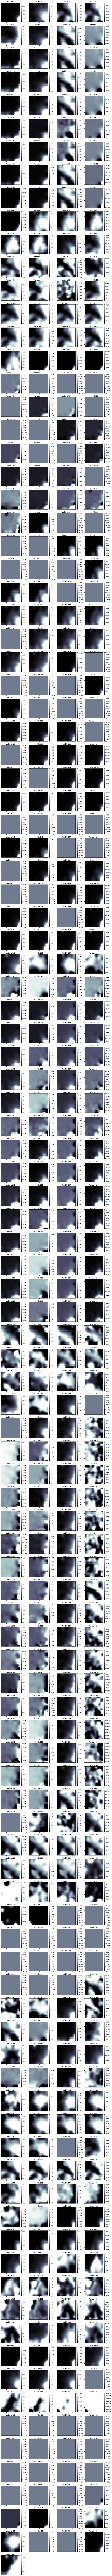

In [166]:
from sompy.visualization.mapview import View2D
view2D  = View2D(15,15,"time-series",text_size=10, names=names)
view2D.show(sm, col_sz=4, which_dim="all", desnormalize=True)

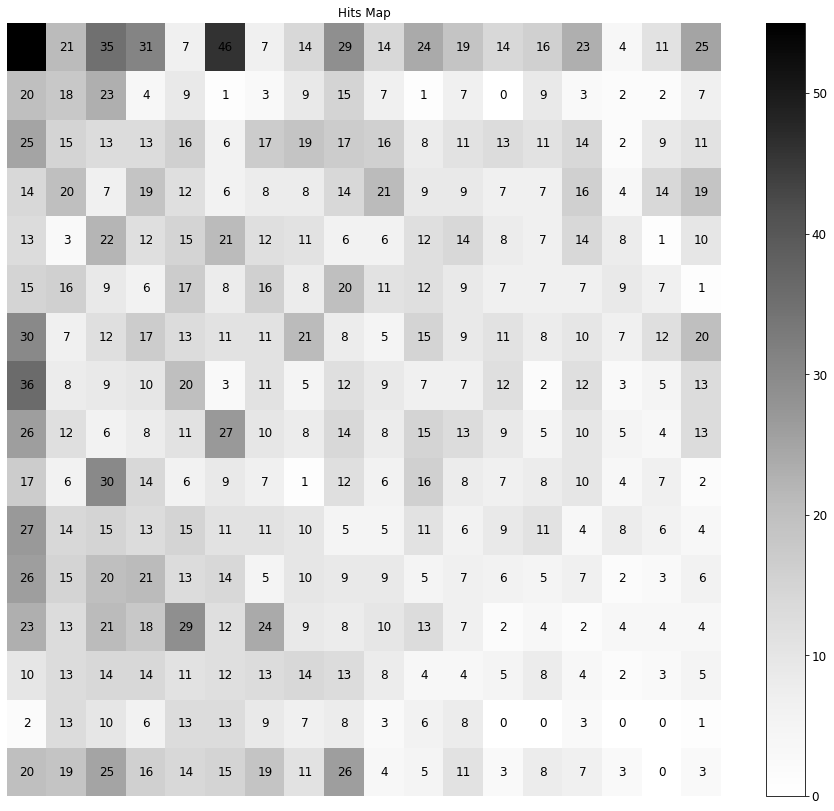

In [154]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [173]:
sm._calculate_ms_and_mpd()

(18, 0.09019730660820545)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


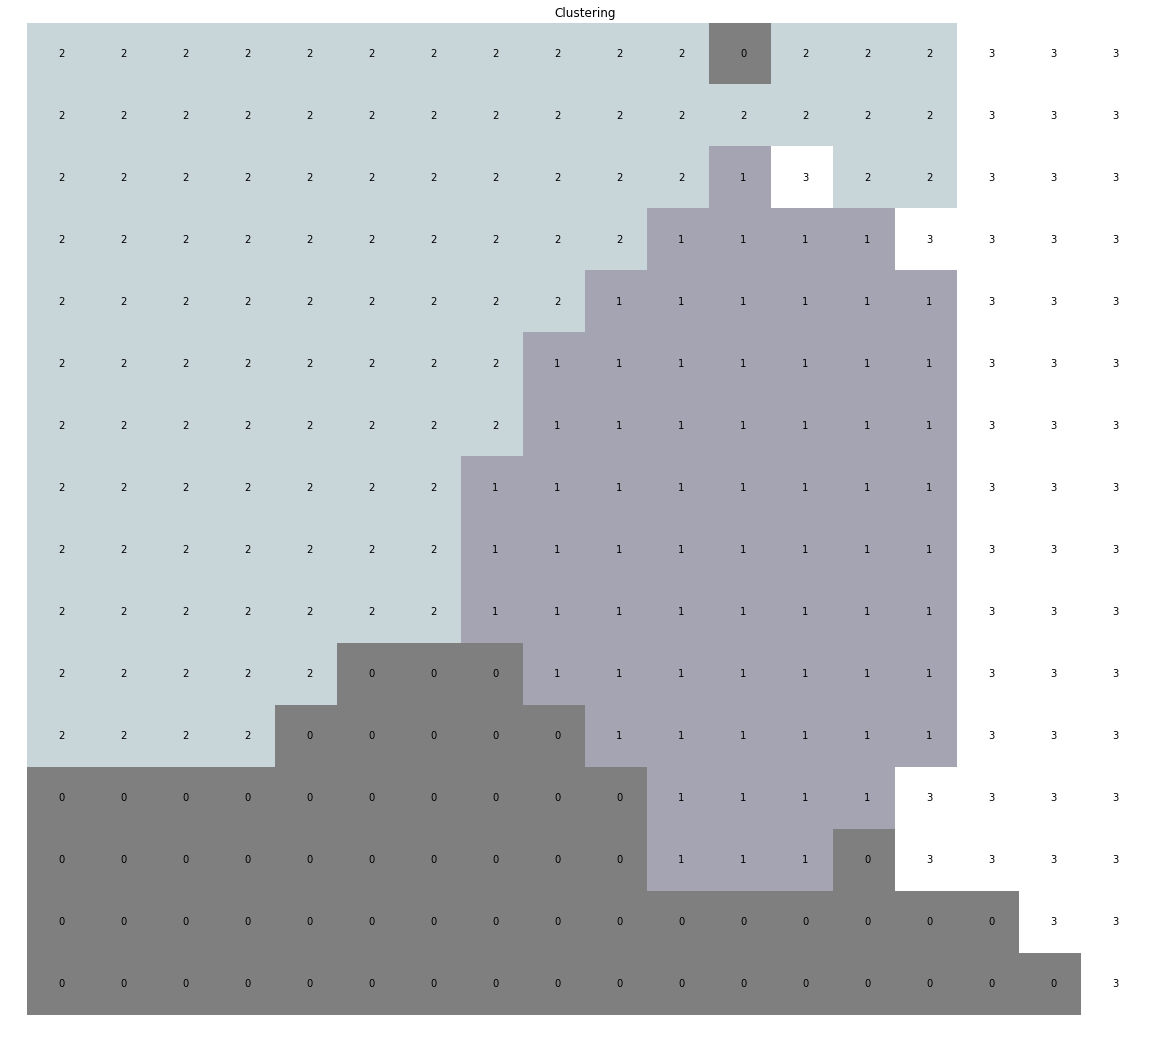

In [198]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a=hits.show(sm)

In [156]:
import sompy

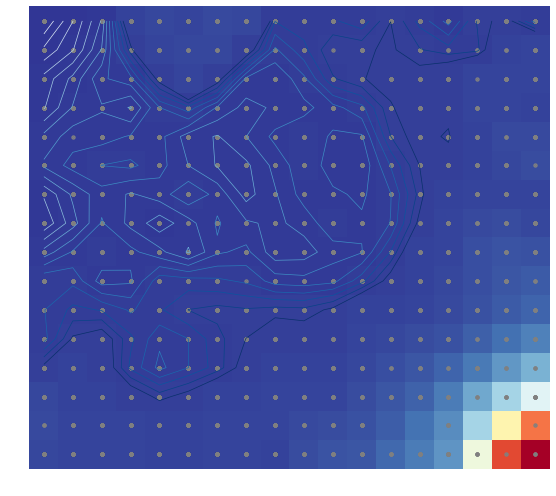

In [157]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)
UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

In [253]:
clusters = sm.cluster(n_clusters=6)

In [254]:
map_dict = {}
for i, j in enumerate(clusters):
    map_dict[i] = j

In [255]:
assignment = pd.DataFrame(sm._bmu).T

In [256]:
assignment[0] = assignment[0].astype(int)
assignment.head()

,0,1
0,7,7.454603
1,96,5.905779
2,158,8.984181
3,126,8.258327
4,155,9.648597


In [257]:
cluster_assignments = assignment[0].map(map_dict)

In [260]:
df_assigned = extracted_features.reset_index().join(pd.DataFrame(cluster_assignments))

In [261]:
new_df = plot_df.join(pd.DataFrame(cluster_assignments), rsuffix='clus')
new_df.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)

In [262]:
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,37.741581,-27.566444,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,...,0.0,0.0,0.621100,0.0,28,0,06,0,20G,3
1,13.865273,-0.667339,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,...,0.0,0.0,0.236220,0.0,34,0,4,1,35A,3
2,-40.219021,-46.815456,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,...,0.0,0.0,5.145510,1.0,100,1,02,2,C09,2
3,27.312504,34.254196,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,...,0.0,0.0,0.109897,0.0,152,1,02,3,00L,3
4,14.922091,-47.124943,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,...,0.0,0.0,4.060313,1.0,182,0,8,4,16K,0


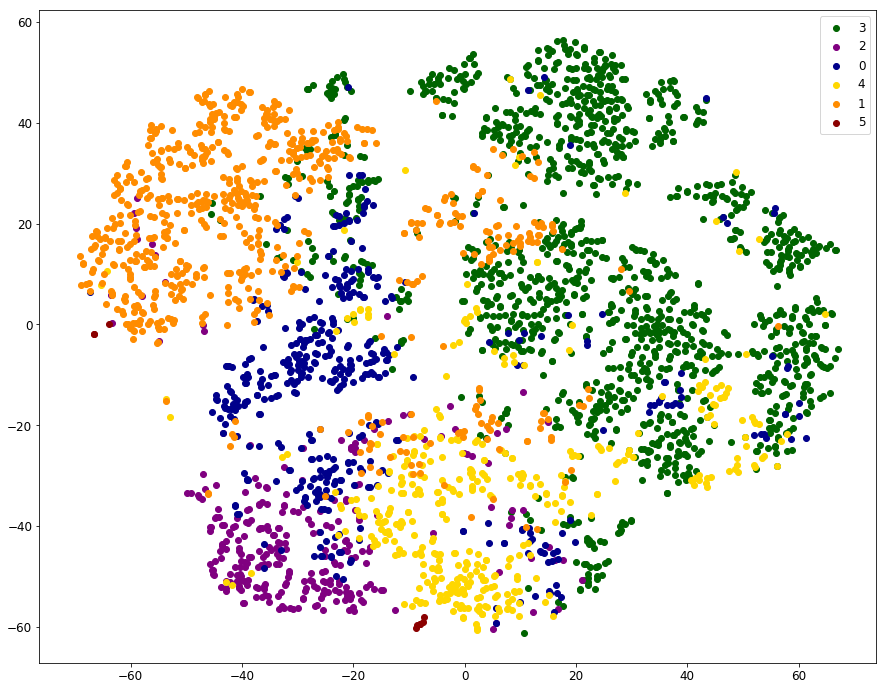

In [263]:
f, ax = plt.subplots(figsize=(15,12))

colors=['darkblue', 'darkorange', 'purple', 'darkgreen', 'gold', 'darkred']

for i in new_df['cluster'].unique():
    ax.scatter(new_df[new_df['cluster'] == i]['tsne1'], new_df[new_df['cluster'] == i]['tsne2'],
    color=colors[i], label=i)           
    
ax.legend()

### To do:

* Clean up code and remove all redundant code
* Run EDA on clusters, see if you can extract meaning and the features that seperate them/
